In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import ast

In [2]:
csv_path = [
   "../../Raw_CSV/April 25-26 - 2022/Jobstreet/Jobstreet-motion-graphic-artist.csv",
   "../../Raw_CSV/April 27 - 2022/Jobstreet/Jobstreet-motion-graphic-artist.csv",
    "../../Raw_CSV/April 28 - 2022/Jobstreet/Jobstreet-motion-graphic-artist.csv", 
]
merge = pd.concat(map(pd.read_csv,csv_path),ignore_index=True)
merge["Salary"].str.strip()
merge

,Title,Company,Location,Summary,Salary,Qualification & Skills,Role and Responsibilities,Job Type,Company Profile&Job Desc,Career Level,Benefits,Company Size
0,"3D Graphic Artist (Sto. Tomas, Batangas: 15K-2...",SAGASS CONSULTING,Calabarzon & Mimaropa,Candidate must possess at least a Bachelor's/C...,"PHP 15,000 - PHP 25,000","[""Candidate must possess at least a Bachelor's...",[],"['10 Full-Time position(s) available.', 'Full-...","[""Requirements:Candidate must possess at least...",1-4 Years Experienced Employee,[],1 - 50 Employees
1,Graphic Artist/Web Graphic Artist,"C3 Interactive Manila, Inc.",Taguig City,None,None,[],"['Qualifications:', ""Bachelor's/College Degree...","['Full-Time', 'Average Processing Time']","[""Qualifications:Bachelor's/College Degree in ...",1-4 Years Experienced Employee,"['Medical, Casual (e.g. T-shirts), Work From H...",1 - 50 Employees
2,"3D Graphic Artist (Sto. Tomas, Batangas: 15K-2...",SAGASS CONSULTING,Calabarzon & Mimaropa,Candidate must possess at least a Bachelor's/C...,"PHP 15,000 - PHP 25,000","[""Candidate must possess at least a Bachelor's...",[],"['10 Full-Time position(s) available.', 'Full-...","[""Requirements:Candidate must possess at least...",1-4 Years Experienced Employee,[],1 - 50 Employees
3,Graphic Artist,Raffco International Trading Corp.,National Capital Reg,Responsible for continuously maintaining the c...,"PHP 20,000 - PHP 25,000","[""Responsible for continuously maintaining the...",[],['·\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Passion and...,"[""Graphic Artist:Responsible for continuously ...",1-4 Years Experienced Employee,"['Medical, Loans, Regular hours, Mondays - Fri...",201 - 500 Employees
4,Multimedia Artist,Victoria Sports,Quezon City,None,"PHP 16,000 - PHP 22,000",[],"['DUTIES AND RESPONSIBILITIES:', '1.\xa0\xa0\x...","['Full-Time', 'Average Processing Time']",['DUTIES AND RESPONSIBILITIES:1.\xa0\xa0\xa0\x...,1-4 Years Experienced Employee,"['Medical, Business (e.g. Shirts)']",51 - 200 Employees
...,...,...,...,...,...,...,...,...,...,...,...,...
209,Graphics Artist,Cashalo,Quezon,Translate marketing objectives into clear crea...,None,['Translate marketing objectives into clear cr...,"['Company Employee Title:', 'Graphics Artist',...",['Full-Time'],['Company Employee Title:Graphics ArtistJob Re...,NaN,[],1 - 50 Employees
210,UI Illustrator (Experiments),Xendit,National Capital Reg,"Deliver well-crafted, beautiful UI illustratio...",None,"['Deliver well-crafted, beautiful UI illustrat...",['Xendit provides payment infrastructure acros...,[],['Xendit provides payment infrastructure acros...,NaN,[],NaN
211,Senior Multimedia Designer,Home Credit Philippines,National Capital Reg,At least 4-5 years of work experience as a mul...,None,['At least 4-5 years of work experience as a m...,['You know you are the perfect fit if you are/...,"['Full-Time', 'Average Processing Time']","[""You know you are the perfect fit if you are/...",1-4 Years Experienced Employee,"['Dental, Miscellaneous allowance, Medical, Lo...",None
212,Multimedia Producer,ABS-CBN Corporation,Quezon,Serve as the videographer for productions shoots.,None,['Serve as the videographer for productions sh...,"[""ABS-CBN Corporation is the Philippines' lead...",[],"[""BUSINESS SUMMARYABS-CBN Corporation is the P...",NaN,"['Medical, Regular hours, Mondays - Fridays, -']",2001 - 5000 Employees


In [3]:
merge

,Title,Company,Location,Summary,Salary,Qualification & Skills,Role and Responsibilities,Job Type,Company Profile&Job Desc,Career Level,Benefits,Company Size
0,"3D Graphic Artist (Sto. Tomas, Batangas: 15K-2...",SAGASS CONSULTING,Calabarzon & Mimaropa,Candidate must possess at least a Bachelor's/C...,"PHP 15,000 - PHP 25,000","[""Candidate must possess at least a Bachelor's...",[],"['10 Full-Time position(s) available.', 'Full-...","[""Requirements:Candidate must possess at least...",1-4 Years Experienced Employee,[],1 - 50 Employees
1,Graphic Artist/Web Graphic Artist,"C3 Interactive Manila, Inc.",Taguig City,None,None,[],"['Qualifications:', ""Bachelor's/College Degree...","['Full-Time', 'Average Processing Time']","[""Qualifications:Bachelor's/College Degree in ...",1-4 Years Experienced Employee,"['Medical, Casual (e.g. T-shirts), Work From H...",1 - 50 Employees
2,"3D Graphic Artist (Sto. Tomas, Batangas: 15K-2...",SAGASS CONSULTING,Calabarzon & Mimaropa,Candidate must possess at least a Bachelor's/C...,"PHP 15,000 - PHP 25,000","[""Candidate must possess at least a Bachelor's...",[],"['10 Full-Time position(s) available.', 'Full-...","[""Requirements:Candidate must possess at least...",1-4 Years Experienced Employee,[],1 - 50 Employees
3,Graphic Artist,Raffco International Trading Corp.,National Capital Reg,Responsible for continuously maintaining the c...,"PHP 20,000 - PHP 25,000","[""Responsible for continuously maintaining the...",[],['·\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Passion and...,"[""Graphic Artist:Responsible for continuously ...",1-4 Years Experienced Employee,"['Medical, Loans, Regular hours, Mondays - Fri...",201 - 500 Employees
4,Multimedia Artist,Victoria Sports,Quezon City,None,"PHP 16,000 - PHP 22,000",[],"['DUTIES AND RESPONSIBILITIES:', '1.\xa0\xa0\x...","['Full-Time', 'Average Processing Time']",['DUTIES AND RESPONSIBILITIES:1.\xa0\xa0\xa0\x...,1-4 Years Experienced Employee,"['Medical, Business (e.g. Shirts)']",51 - 200 Employees
...,...,...,...,...,...,...,...,...,...,...,...,...
209,Graphics Artist,Cashalo,Quezon,Translate marketing objectives into clear crea...,None,['Translate marketing objectives into clear cr...,"['Company Employee Title:', 'Graphics Artist',...",['Full-Time'],['Company Employee Title:Graphics ArtistJob Re...,NaN,[],1 - 50 Employees
210,UI Illustrator (Experiments),Xendit,National Capital Reg,"Deliver well-crafted, beautiful UI illustratio...",None,"['Deliver well-crafted, beautiful UI illustrat...",['Xendit provides payment infrastructure acros...,[],['Xendit provides payment infrastructure acros...,NaN,[],NaN
211,Senior Multimedia Designer,Home Credit Philippines,National Capital Reg,At least 4-5 years of work experience as a mul...,None,['At least 4-5 years of work experience as a m...,['You know you are the perfect fit if you are/...,"['Full-Time', 'Average Processing Time']","[""You know you are the perfect fit if you are/...",1-4 Years Experienced Employee,"['Dental, Miscellaneous allowance, Medical, Lo...",None
212,Multimedia Producer,ABS-CBN Corporation,Quezon,Serve as the videographer for productions shoots.,None,['Serve as the videographer for productions sh...,"[""ABS-CBN Corporation is the Philippines' lead...",[],"[""BUSINESS SUMMARYABS-CBN Corporation is the P...",NaN,"['Medical, Regular hours, Mondays - Fridays, -']",2001 - 5000 Employees


In [4]:
merge.describe()

,Title,Company,Location,Summary,Salary,Qualification & Skills,Role and Responsibilities,Job Type,Company Profile&Job Desc,Career Level,Benefits,Company Size
count,214,214,214,214,214,214,214,214,214,209,214,208
unique,47,48,18,42,17,47,41,15,58,3,33,7
top,eLearning Instructional Designer Developer | W...,Fusion360,National Capital Reg,None,None,[],[],"['Full-Time', 'Average Processing Time']","[""Dare to be #DifferentByDesign? Grab the oppo...",1-4 Years Experienced Employee,[],51 - 200 Employees
freq,22,35,94,57,157,57,79,81,17,173,54,88


In [5]:
job_title_lower = merge["Title"].str.lower()

In [6]:
job_title = job_title_lower.value_counts()[0:10]

In [7]:
sort = job_title.sort_values()

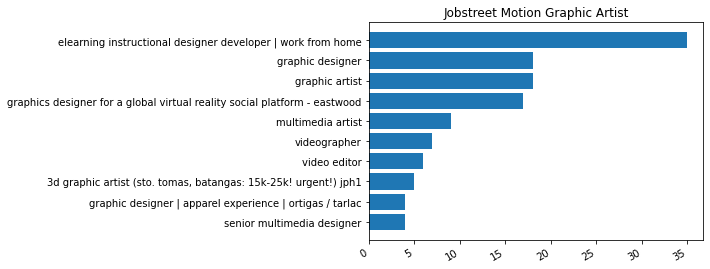

In [8]:
plt.barh(sort.index, sort.values)
plt.title("Jobstreet Motion Graphic Artist")
plt.xticks(rotation="30", ha="right")
plt.show()

In [9]:
company_name = merge["Company"].value_counts()[0:10]

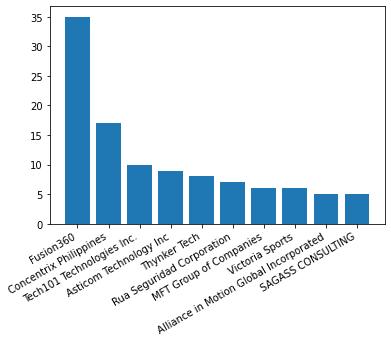

In [10]:
plt.bar(company_name.index, company_name.values)
plt.xticks(rotation="30", ha="right")
plt.show()

In [11]:
company_location = merge["Location"].value_counts()[0:10]

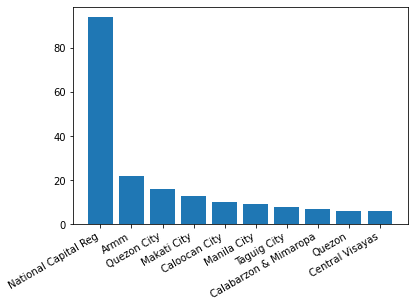

In [12]:
plt.bar(company_location.index, company_location.values)
plt.xticks(rotation="30", ha="right")
plt.show()


In [13]:
filt = (merge["Salary"] != "None")
results = merge.loc[filt]

In [14]:
salary = results["Salary"].value_counts()[0:10]

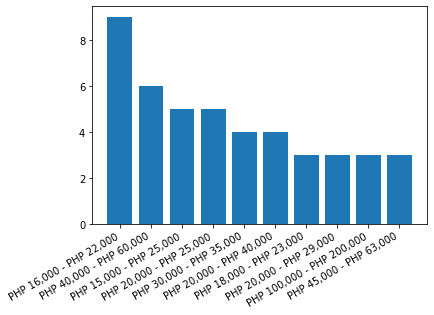

In [15]:
plt.bar(salary.index, salary.values)
plt.xticks(rotation="30", ha="right")
plt.show()

In [16]:
job_type = merge["Job Type"].apply(ast.literal_eval)
job_type_append = []
for i in job_type:
    job_type_append.append(job_type[0][0])

In [17]:
# List to Dataframe ( Count Job Type )
job_type_df = pd.DataFrame(job_type_append,columns=["Job Type"])
job_type_df.value_counts()


Job Type                           
10 Full-Time position(s) available.    214
dtype: int64

In [18]:
career_level = merge["Career Level"]
count_career_level = career_level.value_counts()
count_career_level

1-4 Years Experienced Employee                  173
Less than 1 Year Experienced Employee            18
Supervisor/5 Years & Up Experienced Employee     18
Name: Career Level, dtype: int64

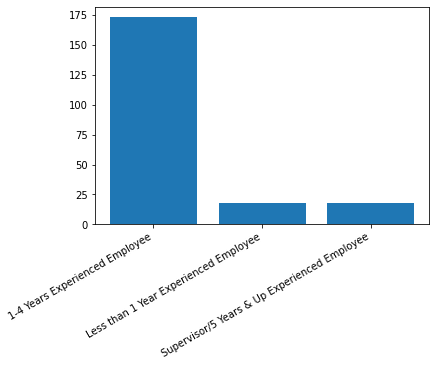

In [19]:
plt.bar(count_career_level.index, count_career_level.values)
plt.xticks(rotation="30",ha="right")
plt.show()

In [20]:
company_size = merge["Company Size"]
count_company_size = company_size.value_counts()[0:6]
count_company_size

51 - 200 Employees       88
1 - 50 Employees         51
201 - 500 Employees      21
None                     21
2001 - 5000 Employees    12
501 - 1000 Employees     10
Name: Company Size, dtype: int64

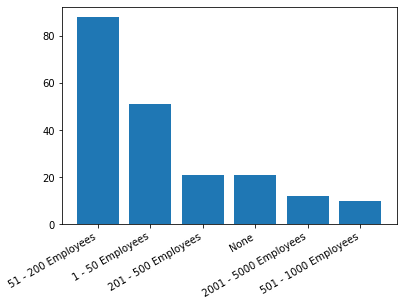

In [21]:
plt.bar(count_company_size.index, count_company_size.values)
plt.xticks(rotation="30",ha="right")
plt.show()

In [22]:
benefits = merge["Benefits"].str.replace("^\['|'\]$","")
benefits_append = []
split_benefits = benefits.str.split(",")

for i in range(len(split_benefits)):
    for j in split_benefits[i]:
        benefits_append.append(j)


/var/folders/tc/qdg72rpx523gjsqcr2vf_0c00000gn/T/ipykernel_2143/2971443327.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  benefits = merge["Benefits"].str.replace("^\['|'\]$","")


In [23]:
benefits_df = pd.DataFrame(benefits_append, columns=["Benefits"])
benefits_df = benefits_df["Benefits"].str.strip()
filt = (benefits_df != "[]")
benefits_df = benefits_df.loc[filt]
benefits_count = benefits_df.value_counts()[0:15]
benefits_count



Medical                                               160
Miscellaneous allowance                               119
Dental                                                 81
Business (e.g. Shirts)                                 71
Education support                                      66
Regular hours                                          63
Loans                                                  62
Casual (e.g. T-shirts)                                 61
Mondays - Fridays                                      60
Vision                                                 46
Meals                                                  35
Island/Overseas Trips                                  35
Loyalty Incentives and more!                           35
6:30 AM - 3:30 PM (Weekends off and No rush hour!)     35
Sports (e.g. Gym)                                      34
Name: Benefits, dtype: int64

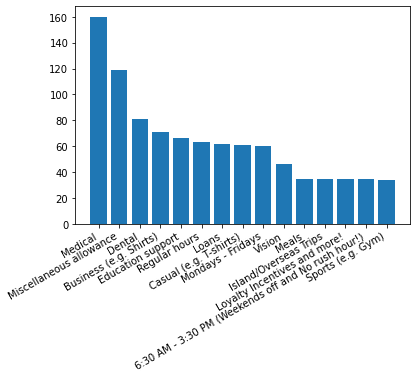

In [24]:
plt.bar(benefits_count.index, benefits_count.values)
plt.xticks(rotation="30",ha="right")
plt.show()

In [25]:
filt = (merge["Salary"] != "None")
salary_career_level = merge[filt].sort_values(by="Salary",ascending=True)
count = salary_career_level[["Title","Salary","Career Level"]]



In [26]:
merge["Career Level"].value_counts()

1-4 Years Experienced Employee                  173
Less than 1 Year Experienced Employee            18
Supervisor/5 Years & Up Experienced Employee     18
Name: Career Level, dtype: int64

In [27]:
salary_append = []
merge = merge.loc[merge["Salary"] != "None"]
merge["Salary"] = merge["Salary"].str.replace(",", "")
merge["Salary"] = merge["Salary"].str.replace("PHP", "")
merge["Salary"] = merge["Salary"].str.replace("-", "")
merge["Salary"] = merge["Salary"].str.split("  ")


/var/folders/tc/qdg72rpx523gjsqcr2vf_0c00000gn/T/ipykernel_2143/1619117618.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge["Salary"] = merge["Salary"].str.replace(",", "")
/var/folders/tc/qdg72rpx523gjsqcr2vf_0c00000gn/T/ipykernel_2143/1619117618.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge["Salary"] = merge["Salary"].str.replace("PHP", "")
/var/folders/tc/qdg72rpx523gjsqcr2vf_0c00000gn/T/ipykernel_2143/1619117618.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [28]:
mid_append = []
mid_level = merge.loc[merge["Career Level"] == "1-4 Years Experienced Employee"]
mid_level_salary = mid_level[mid_level["Salary"] != "None"]
count_mid = mid_level_salary["Salary"]
df_mid = count_mid.reset_index()
df_mid = df_mid.drop(columns="index")

for i in range(len(df_mid)):
    salary = df_mid["Salary"][i]
    for j in range(len(salary)):
        mid_append.append(int(salary[j]))

In [29]:
low_append = []
low_level = merge.loc[merge["Career Level"] == "Less than 1 Year Experienced Employee"]
low_level_salary = low_level[low_level["Salary"] != "None"]
count_low = low_level_salary["Salary"]
df_low = count_low.reset_index()
df_low = df_low.drop(columns="index")

for i in range(len(df_low)):
    salary = df_low["Salary"][i]
    for j in range(len(salary)):
        low_append.append(int(salary[j]))

In [30]:
high_append = []
high_level = merge.loc[merge["Career Level"] == "Supervisor/5 Years & Up Experienced Employee"]
high_level_salary = high_level[high_level["Salary"] != "None"]
count_high = high_level_salary["Salary"]
df_high = count_high.reset_index()
df_high = df_high.drop(columns="index")

for i in range(len(df_high)):
    salary = df_high["Salary"][i]
    for j in range(len(salary)):
        high_append.append(int(salary[j]))



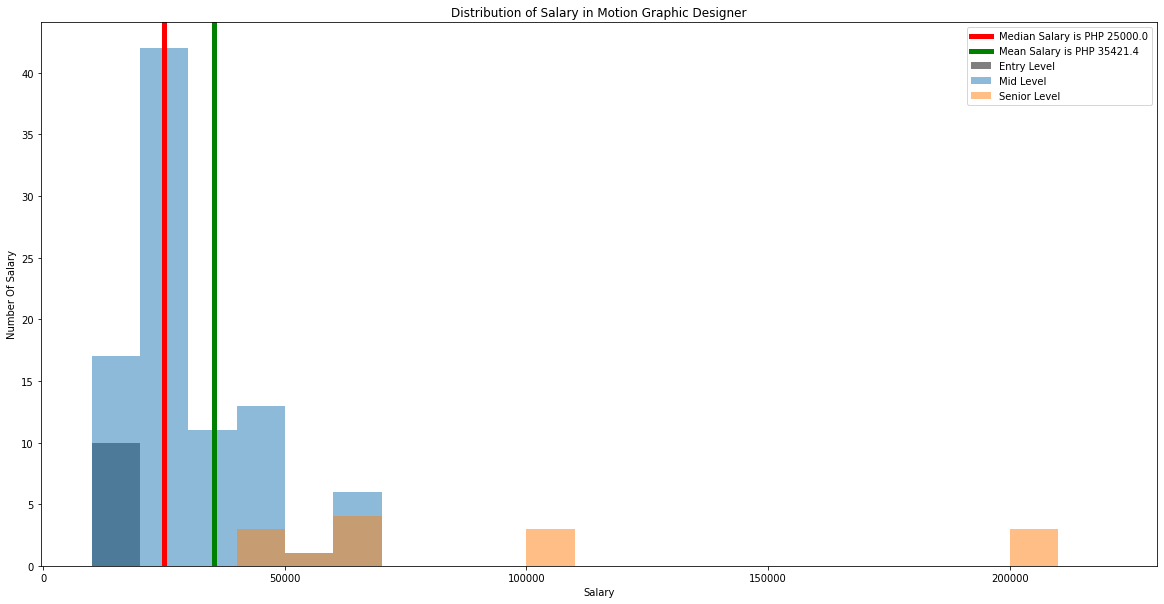

In [31]:
combine_salary = low_append + mid_append + high_append
df_combine_salary = pd.DataFrame(combine_salary, columns=["Combine Salary"])

bins = [10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000,140000,150000,160000,170000,180000,190000,200000,210000,220000]
plt.figure(figsize=(20,10))
plt.hist(low_append,bins=bins,alpha = 0.5,color="black")
plt.hist(mid_append,bins=bins,alpha = 0.5)
plt.hist(high_append,bins=bins,alpha = 0.5)
plt.ylabel("Number Of Salary")
plt.xlabel("Salary")
plt.title("Distribution of Salary in Motion Graphic Designer")
plt.axvline(df_combine_salary["Combine Salary"].median(), linewidth=5,color="red", label="Median Salary is PHP {}".format(df_combine_salary["Combine Salary"].median()))
plt.axvline(df_combine_salary["Combine Salary"].mean(), linewidth=5,color="green", label="Mean Salary is PHP {}".format(df_combine_salary["Combine Salary"].mean()))

plt.legend(["Median Salary is PHP {}".format(df_combine_salary["Combine Salary"].median()),"Mean Salary is PHP {}".format(round(df_combine_salary["Combine Salary"].mean(),2)),'Entry Level', 'Mid Level', 'Senior Level',])
